Задча № 3, Вариант № 7 (начально-краевая задача для волнового уравнения с ГУ первого рода):
\begin{equation*}
 \begin{cases}
   \frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} = -2u,
   \\
   u(0,y)=\cos{y},
   \\
   u(\frac{\pi}{2},y) = 0,
   \\
   u(x,0)=\cos{x}
   \\
   u(x,\frac{\pi}{2})=0.
 \end{cases}
\end{equation*}

Импорт необходимых библиотек

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

Аналитическое решение:
\begin{equation*}
    U(x,y)=\cos x\cos y
\end{equation*}

In [2]:
L = math.pi / 2
n = 10
k = 100
dl = (L)/(n-1)

Задание функции, задающей аналитическое решение

In [3]:
def analit(L,n):
    dl = (L)/(n-1)
    x = np.arange(0,L+L/(n+1),dl)
    y = np.arange(0,L+L/(n+1),dl)
    x,y = np.meshgrid(x,y)
    u = np.cos(x)*np.cos(y)
    return x,y,u

Построение аналитического решения

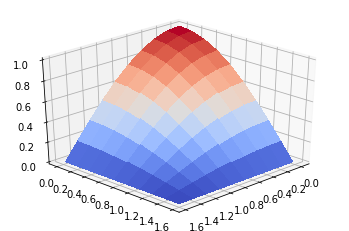

In [4]:
x, y, z = analit(L,n)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(30,45)
plt.draw()

Конечно разностная апроксимация:
\begin{equation*}
 \begin{cases}
   \frac{u_{i-1,j}-2u_{i,j}+u_{i+1,j}}{h_x^2}+\frac{u_{i,j-1}-2u_{i,j}+u_{i,j+1}}{h_y^2} + O(h_x^2,h_y^2) = -2u_{i,j},
   \\
   u_{0,j}=\cos{j*h_y},
   \\
   u_{N_x,j} = 0,
   \\
   u_{i,0}=\cos{i*h_x}
   \\
   u_{i,N_y} = 0,
 \end{cases}
\end{equation*}

In [5]:
# просто гененрирую сетку только с граничными условиями
def generate(L, n):
    h = (L)/(n-1)
    x = np.arange(0,L+L/(n+1),h)
    y = np.arange(0,L+L/(n+1),h)
    u = np.zeros((n,n))
    for i in range(n):
        u[i,0] = np.cos(x[i])
    for j in range(n):
        u[0,j] = np.cos(y[j])
    return u

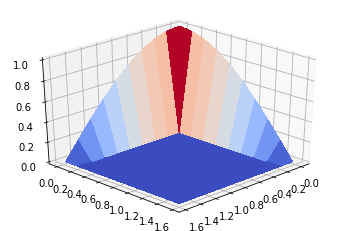

In [6]:
# вывод сетки с только с ГУ
e = generate(L,n)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, y, e, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(30,45)
plt.draw()

<b>Разностно итерационный метод Либмана.</b> Значение в точке для каждой новой итерации будем находить из предыдущей предыдущего слоя как:
\begin{equation*}
   u_{i,j}^{k+1} = \frac{h_x^2h_y^2}{2*(h_x^2+h_y^2)}\left(\frac{u_{i-1,j}^k+u_{i+1,j}^k}{h_x^2}+\frac{u_{i,j-1}^k+u_{i,j+1}^k}{h_y^2} + 2u_{i,j}\right),
\end{equation*}
При этом проверка сходимости: 
\begin{equation*}
||u^{k+1}-u^k||<\varepsilon
\\
||u||=max|u|
\end{equation*}

Создаю трехмерную матрицу, в которой будут сохранятся все вычисленные сетки при каждой новой итерации

In [7]:
s = np.zeros((k,n,n))
s[0]=e
print(len(s))

100


Функция для метода Либмана, где s - это трехмерная матрица решений, k - номер слоя в котором вычисляем значения , i и j - узлы разностной сетки 

In [8]:
def libman(L,n,s,k):
    h = (L)/(n-1)
    # Для начала нужно задать ГУ в новом слое
    for i in range(n):
        s[k+1,i,0] = s[k,i,0]
    for j in range(n):
        s[k+1,0,j] = s[k,0,j]
    # Непосредственно задание
    for i in range(1,n-1):
        for j in range(1,n-1):
            s[k+1,i,j] = (1/4)*(s[k,i-1,j]+s[k,i+1,j]+s[k,i,j-1]+s[k,i,j+1]+h**2*s[k,i,j])
    return s

реализация самого метода либмана (все h_x h_y сокращаются, т.к. решил все делать для квадратной сетки, т.е. равны h_x=h_y):

функция для вычисления разности между двумя соседними итерациями, т.е. нормы

In [12]:
def norma(L,n,s,k):
    q = np.zeros((n-1,n-1))
    for i in range(1,n-1):
        for j in range(1,n-1):
            q[i-1,j-1] = abs(s[k+1,i,j]-s[k,i,j]) 
    m = max(map(max,q))
    return m

расчет методом Либмана пока эпсилон (разность междя двумя соседними итерациями) не станет меньше или равен 0.001

In [13]:
eps = 1
m = 0
while eps>0.001:
    s = libman(L,n,s,m)
    m+=1
    eps = norma(L,n,s,m)
print(n,m,eps)

10 64 0.0009812091170607884


Построение конечной сетки методом либмана

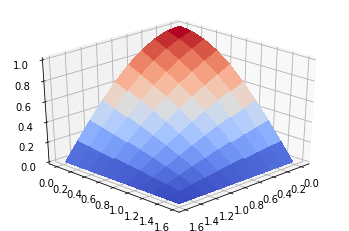

In [14]:
test = s[len(s)-1]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, y, test, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(30,45)
plt.draw()

Построение зависимости изменения нормы от номера итерации

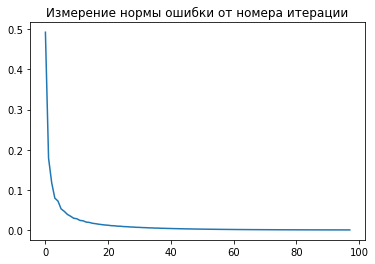

In [15]:
norm_l = []
for i in range(len(s)-2):
    norm_l.append(norma(L,n,s,i))
plt.plot(norm_l)
plt.title('Измерение нормы ошибки от номера итерации')
plt.show()

<b>Метод Зейделя</b> в матричной форме:
\begin{equation*}
    (D+A_1)x^{j+1}+A_2x^j=f   
    \\
    (D+A_1)(x^{j+1}-x^j)+Ax^j=f
\end{equation*}
Где D- диагональная матрица, A_1- нижняя треугольная матрица, А_2- верхняя треугольная матрица
\alpha

Функция для метода Зейделя, где s - это трехмерная матрица решений, k - номер слоя в котором вычисляем значения , i и j - узлы разностной сетки 

In [16]:
def zeidel(L,n,s,k):
    h = (L)/(n-1)
    for i in range(n):
        s[k+1,i,0] = s[k,i,0]
    for j in range(n):
        s[k+1,0,j] = s[k,0,j]
    for i in range(1,n-1):
        for j in range(1,n-1):
            s[k+1,i,j] = (1/4)*(s[k+1,i-1,j]+s[k,i+1,j]+s[k+1,i,j-1]+s[k,i,j+1]+h**2*s[k,i,j])
    return s

Создаю трехмерную матрицу, в которой будут сохранятся все вычисленные сетки при каждой новой итерации

In [17]:
v = np.zeros((k,n,n))
v[0]=e
print(len(v))

100


In [18]:
for i in range(k-1):
    v = zeidel(L,n,v,i)

Построение конечной сетки методом либмана

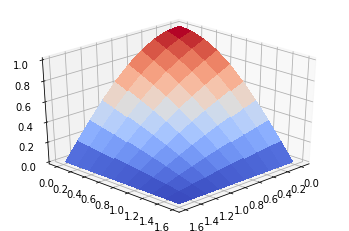

In [19]:
test = v[k-1]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, y, test, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(30,45)
plt.draw()

Построение зависимости изменения нормы от номера итерации

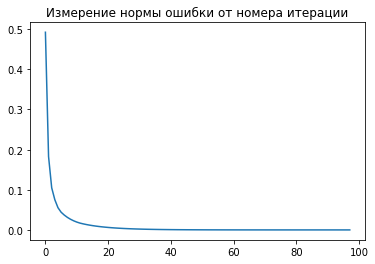

In [20]:
norm_z = []
for i in range(k-2):
    norm_z.append(norma(L,n,v,i))
plt.plot(norm_z)
plt.title('Измерение нормы ошибки от номера итерации')
plt.show()

<b>Метод Верхних релаксаций</b> в матричной форме:
\begin{equation*}
    (D+\omega A_1)\frac{x^{j+1}-x^j}{\omega}+Ax^j=f
\end{equation*}
Где D- диагональная матрица, A_1- нижняя треугольная матрица, А_2- верхняя треугольная матрица
w>0 - заданный числовой параметр

In [21]:
def relax(L,n,s,k,w):
    h = (L)/(n-1)
    for i in range(n):
        s[k+1,i,0] = s[k,i,0]
    for j in range(n):
        s[k+1,0,j] = s[k,0,j]
    for i in range(1,n-1):
        for j in range(1,n-1):
            s[k+1,i,j] = (1/4)*(w*s[k+1,i-1,j]+w*s[k,i+1,j]+w*s[k+1,i,j-1]+w*s[k,i,j+1]+h**2*s[k,i,j]*w)
    return s

Создаю трехмерную матрицу, в которой будут сохранятся все вычисленные сетки при каждой новой итерации

In [22]:
c = np.zeros((k,n,n))
c[0]=e
print(len(c))

100


In [23]:
w = 1.0001
for i in range(k-1):
    c = relax(L,n,c,i,w)

Построение конечной сетки методом либмана

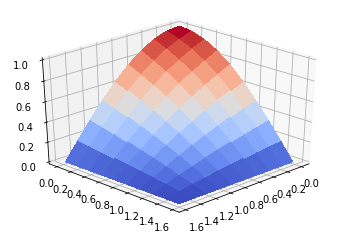

In [24]:
test = c[k-1]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, y, test, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(30,45)
plt.draw()

Построение зависимости изменения нормы от номера итерации

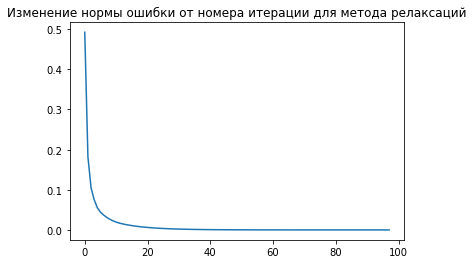

In [25]:
norm_r = []
for i in range(k-2):
    norm_r.append(norma(L,n,v,i))
plt.plot(norm_r)
plt.title('Изменение нормы ошибки от номера итерации для метода релаксаций')
plt.show()
    

Задание функций для расчета погрешностей для всех трех методов

In [26]:
def pogr_l(L,n):
    x, y, u = analit(L,n)
    print(len(u))
    e = generate(L,n)
    a = np.zeros((10000,n,n))
    a[0]=e
    eps = 1
    m = 0
    while eps>0.001:
        a = libman(L,n,a,m)
        eps = norma(L,n,a,m)
        m+=1
    z = max(map(max,abs(a[m]-u)))
    return a[m],m,z

In [27]:
def pogr_z(L,n):
    x, y, u = analit(L,n)
    print(len(u))
    e = generate(L,n)
    a = np.zeros((10000,n,n))
    a[0]=e
    eps = 1
    m = 0
    while eps>0.001:
        a = zeidel(L,n,a,m)
        eps = norma(L,n,a,m)
        m+=1
    z = max(map(max,abs(a[m]-u)))
    return a[m],m,z

In [28]:
def pogr_r(L,n):
    x, y, u = analit(L,n)
    print(len(u))
    e = generate(L,n)
    a = np.zeros((10000,n,n))
    a[0]=e
    eps = 1
    m = 0
    while eps>0.001:
        a = relax(L,n,a,m,w)
        eps = norma(L,n,a,m)
        m+=1
    z = max(map(max,abs(a[m]-u)))
    return a[m],m,z

Нахождение и построение графика погрешности численного решение в сравнении с аналитическим. (числа кратные 10 нужны просто чтобы следить вычисляет ли машина что-то)

10
10
10
20
20
20
30
30
30
40
40
40
50
50
50
60
60
60
70
70
70
80
80
80
90
90
90


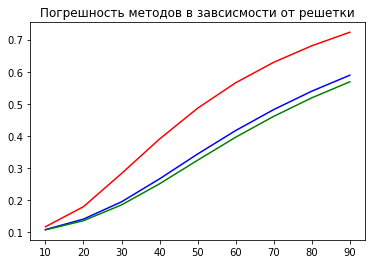

In [33]:
list_pogr_l = []
list_pogr_z = []
list_pogr_r = []
for i in range(1,10):
    a_l,m_l,pogres_l = pogr_l(L,i*10)
    a_z,m_z,pogres_z = pogr_z(L,i*10)
    a_l,m_l,pogres_r = pogr_r(L,i*10)
    list_pogr_l.append(pogres_l)
    list_pogr_z.append(pogres_z)
    list_pogr_r.append(pogres_r)
asd = [10,20,30,40,50,60,70,80,90]
plt.plot(asd,list_pogr_l,'r')
plt.plot(asd,list_pogr_z,'b')
plt.plot(asd,list_pogr_r,'g')
plt.title('Погрешность методов в завсисмости от решетки')
plt.show()

Задание функции для выисления погрешности для метода либмана с зависимостью от невязки

In [30]:
def pogr_l_eps(L,n,qwe):
    x, y, u = analit(L,n)
    print(len(u))
    e = generate(L,n)
    a = np.zeros((10000,n,n))
    a[0]=e
    eps = 1
    m = 0
    while eps>qwe:
        a = libman(L,n,a,m)
        eps = norma(L,n,a,m)
        m+=1
    z = max(map(max,abs(a[m]-u)))
    return a[m],m,z

тут тоже по оси x непонятно что стоит пока, но это 

60
60
60
60


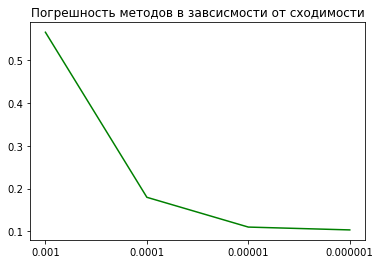

In [35]:
list_pogr_l_eps = []
for i in range(1,5):
    a_l,m_l,pogres_l = pogr_l_eps(L,60,0.01*0.1**i)
    list_pogr_l_eps.append(pogres_l)
plt.plot(['0.001', '0.0001', '0.00001', '0.000001'],list_pogr_l_eps,'g')
plt.title('Погрешность методов в завсисмости от сходимости')
plt.show()

<b>Вывод:</b> 
<ul>
    <li>При сравнении погрешностей решений полученных различными методами наименее точным оказался метод Либмана, а самым точным оказался метод верхних релаксаций </li>
    <li>При увеличении количества узлов сетки, т.е. при увеличении сеточных параметров h_x и h_y, происходит увеличении погрешности. Это связано с тем, что при увеличении количества узлов сетки решения на соседних итерациях полученные методами Либмана, Зейделя и верхней релаксиции, начинают меньше отличаться друг от друга, в следствии чего, так как невязка остается неизменной, конечное решение начинает все больше отличаться от аналитического решения.</li>
</ul>